# Diabetes prediction for PIMA Indian population dataset using ML.


In [2]:
#Importing the libraries required.
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
#Uploading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/mini/diabetes_data.csv')

In [9]:
dataset.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

In [10]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
#dataset preparation for model
X = dataset.drop(columns = 'Outcome', axis=1)
Y = dataset("Outcome")

In [26]:
#Data preprocessing - Data Standardization
scaler = StandardScaler()
scaler.fit(X)
std_data = scaler.transform(X)
#print(std_data)

In [29]:
#Splitting the datasets
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y, random_state=2)

In [32]:
#Training the dataset
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)

SVC(kernel='linear')

In [35]:
#Evaluation of the model

X_train_predict = clf.predict(X_train)
training_acc = accuracy_score(X_train_predict, Y_train)
print(training_acc)

0.7833876221498371


In [36]:
#Accuracy of test 
X_test_predict = clf.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)
print(test_acc)

0.7727272727272727


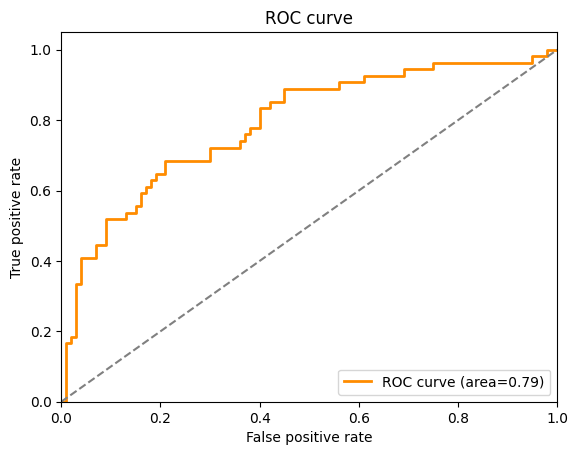

[-1.92604688 -1.72765321  0.38509839  0.68806575 -1.67242021 -1.59402973
 -1.67520339  2.01314718 -1.13268667  0.07270973  2.66549455 -0.56665309
 -1.01054707  0.71264611 -0.58545955  1.06730919 -1.74404353 -1.2242359
 -2.04503428 -0.48051517 -0.97114536 -0.30916996  0.27369119 -2.99450314
 -2.70280837 -0.90943301 -3.86446141  1.29017797 -0.05129247  0.24128479
 -0.37775619 -1.30353649 -1.9930119   1.21044762 -1.19391771 -0.98513957
 -2.45777289 -1.58055538 -2.1451036  -2.06072621  0.48958188 -0.86146563
 -0.66385902  0.94516812 -0.9507738  -1.00388013 -0.51025021 -1.23577242
 -3.34945652 -1.19502854 -0.6376715  -1.70396666  0.24701747 -1.76941862
  1.59278765 -0.74007634 -1.96125726 -2.47434179 -0.52130802 -2.14344965
 -0.31378358 -1.70240564 -0.83127216 -0.93046626  1.97154524 -0.34214329
 -1.00172589  0.87906957 -0.22130077 -1.4879027   0.49393687 -0.92173965
  0.37486366 -5.38778971  1.80058649 -1.81329064 -3.43821432 -0.33151401
 -1.05264028 -0.72101389 -2.92495767 -1.8693148  -2.

In [38]:
y_score = clf.decision_function(X_test)

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

fpr=[]
tpr=[]


fpr,tpr,_ = metrics.roc_curve(Y_test, y_score)
#we have an underscore there because this functions returns 3 values 
#but we dont need the third value therefore place a an underscore there

roc_auc = auc(fpr,tpr)
#plot the figure
plt.figure()
lw=2
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()
print(y_score)